In [1]:
%qtconsole
%load_ext autoreload
%autoreload 2
%load_ext ipycache

In [3]:
import sys
sys.path.append('/home/jfear/devel/GalaxyTools')

In [4]:
from baPlot import *
%matplotlib inline

Grab the command line options

In [5]:
myopts = ['--input', '/home/jfear/tmp/tmp.CTDpTMybXV',
          '--design', '/home/jfear/tmp/tmp.23akltr47Y',
          '--ID', 'NameJMF',
          '--ba', '/home/jfear/sandbox/secim/data/test_ba.pdf',
          '--flag_dist', '/home/jfear/sandbox/secim/data/test_dist.pdf',
          '--flag_summary', '/home/jfear/sandbox/secim/data/test_flag_summary.tsv',
          '--debug']

args = getOptions(myopts=myopts)


Create a class for handling Flags

In [6]:
dat = wideToDesign(args.fname, args.dname, args.uniqID, args.group)

if args.processOnly:
    toProcess = dat.design[dat.design[args.group].isin(args.processOnly)].index
else:
    toProcess = dat.sampleIDs
    
wide = dat.wide.loc[:, toProcess]

# Create a FlagOutlier object to store all flags
flags = FlagOutlier(dat.wide.index)

# Open a multiple page PDF for plots
ppBA = PdfPages(args.baName)

In [7]:
# Grab group
#grp = dat.design.groupby(dat.group)
#i = 'B033'
#val = grp.get_group(i)
val = dat.design

# Create combos
combos = list(combinations(val.index, 2))

In [190]:
#%%cache ba_flags.pkl flags

#iterateCombo(wide, combos, ppBA, flags, args.cutoff, group=i)

[Saved variables flags to file '/home/jfear/devel/GalaxyTools/notebook/ba_flags.pkl'.]


/home/jfear/devel/GalaxyTools/baPlot.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ax2, outlier = makeBA(data[combo[0]], data[combo[1]], ax2, cutoff)
/usr/lib/pymodules/python2.7/matplotlib/backends/backend_pdf.py:2184: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)


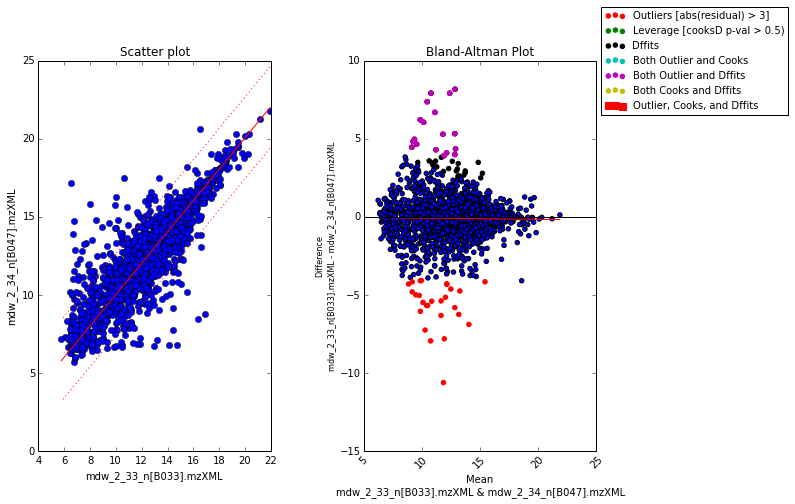

In [9]:
combo = combos[0]
data = wide
out = ppBA
cutoff = 3

rows = data.shape[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), dpi=300)
fig.subplots_adjust(wspace=0.4)
subset = data.loc[:, [combo[0], combo[1]]]

# Drop missing value
subset.dropna(inplace=True)
missing = rows - subset.shape[0]

# Set X's and Y's
x, y = subset.iloc[:, 0], subset.iloc[:, 1]

# Scatter Plot
ax1 = makeScatter(subset.iloc[:, 0], subset.iloc[:, 1], ax1)

# BA plot
ax2, outlier = makeBA(subset.iloc[:, 0], subset.iloc[:, 1], ax2, cutoff)


In [39]:
low, up, fit, resid, infl = runRegression(x, y)